<a href="https://colab.research.google.com/github/wojtekkrr/Keras_CIFAR10_Classification/blob/main/10_Neural_Nets_Keras_CIFAR10_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from numpy.random import seed
seed(888)
import tensorflow
tensorflow.random.set_seed(404)

In [ ]:
import os
import numpy as np
import tensorflow as tf
import itertools

import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout

from IPython.display import display
from keras.preprocessing.image import array_to_img
from keras.callbacks import TensorBoard

from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

%matplotlib inline

# Constants

In [ ]:
LABEL_NAMES = ["Plain", 'Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

IMAGE_WIDTH = 32
IMAGE_HEIGHT = 32
IMAGE_PIXELS = IMAGE_WIDTH * IMAGE_HEIGHT
COLOR_CHANNELS = 3
TOTAL_INPUTS = IMAGE_PIXELS * COLOR_CHANNELS

VALIDATION_SIZE = 10000
SMALL_TRAIN_SIZE = 1000

NR_CLASSES = 10

# Get the Data

In [ ]:
(x_train_all, y_train_all), (x_test, y_test) = cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


# Explore the Data

In [ ]:
pic = array_to_img(x_train_all[99])

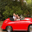

In [ ]:
display(pic)

In [ ]:
y_train_all.shape

(50000, 1)

In [ ]:
y_train_all[99][0]

1

In [ ]:
LABEL_NAMES[7]

'Horse'

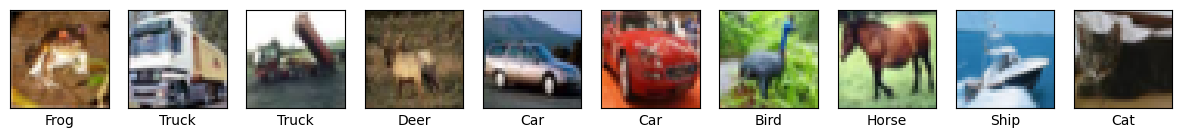

In [ ]:
plt.figure(figsize=(15, 5))

for i in range(10):
    plt.subplot(1, 10, i + 1)

    plt.imshow(x_train_all[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(LABEL_NAMES[y_train_all[i][0]], fontsize=10)

plt.show()

In [ ]:
x_train_all.shape

(50000, 32, 32, 3)

In [ ]:
x_test.shape

(10000, 32, 32, 3)

# Preprocess Data

In [ ]:
# Kompresja do części całości, aby ułatwić gradient descent

x_train_all, x_test = x_train_all / 255.0, x_test / 255.0

In [ ]:
x_train_all = x_train_all.reshape(x_train_all.shape[0], TOTAL_INPUTS)

In [ ]:
x_train_all.shape

(50000, 3072)

In [ ]:
x_test = x_test.reshape(len(x_test), TOTAL_INPUTS)

In [ ]:
x_test.shape

(10000, 3072)

## Create Validation Dataset

In [ ]:
x_val = x_train_all[:VALIDATION_SIZE]
y_val = y_train_all[:VALIDATION_SIZE]
x_val.shape

(10000, 3072)

In [ ]:
x_train = x_train_all[VALIDATION_SIZE:]
y_train = y_train_all[VALIDATION_SIZE:]
x_train.shape

(40000, 3072)

### Create a small dataset (for illustration)

In [ ]:
x_train_xs = x_train_all[:SMALL_TRAIN_SIZE]
y_train_xs = y_train_all[:SMALL_TRAIN_SIZE]
x_train_xs[0]

array([0.23137255, 0.24313725, 0.24705882, ..., 0.48235294, 0.36078431,
       0.28235294])

# Define Neural Network Using KERAS

In [ ]:
model_1 = Sequential([
    Dense(units=128, input_dim=TOTAL_INPUTS, activation='relu', name="m1_hidden1"),
    Dense(units=64, activation='relu', name="m1_hidden2"),
    Dense(16, activation='relu', name="m1_hidden3"),
    Dense(10, activation='softmax', name="m1_output")
])

model_1.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'],)

In [ ]:
#alternatywny sposób zapisu

model_2 = Sequential()

model_2.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))

model_2.add(Dense(128, activation='relu', name="m2_hidden1"))
model_2.add(Dense(64, activation='relu', name="m2_hidden2"))
model_2.add(Dense(16, activation='relu', name="m2_hidden3"))
model_2.add(Dense(10, activation='softmax', name="m2_output"))

model_2.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'],)

In [ ]:
model_3 = Sequential()

model_3.add(Dropout(0.2, seed=42, input_shape=(TOTAL_INPUTS,)))
model_3.add(Dense(128, activation='relu', name="m2_hidden1"))

model_3.add(Dropout(0.25, seed=42))
model_3.add(Dense(64, activation='relu', name="m2_hidden2"))
model_3.add(Dense(16, activation='relu', name="m2_hidden3"))
model_3.add(Dense(10, activation='softmax', name="m2_output"))

model_3.compile(optimizer="adam",
                loss="sparse_categorical_crossentropy",
                metrics=['accuracy'],)

In [ ]:
type(model_1)

keras.src.engine.sequential.Sequential

In [ ]:
# Sprawdzenie czy GPU jest podpięte

print("GPU dostępne: ", tf.config.list_physical_devices('GPU'))

GPU dostępne:  []


In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 m1_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 m1_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m1_hidden3 (Dense)          (None, 16)                1040      
                                                                 
 m1_output (Dense)           (None, 10)                170       
                                                                 
Total params: 402810 (1.54 MB)
Trainable params: 402810 (1.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dropout (Dropout)           (None, 3072)              0         
                                                                 
 m2_hidden1 (Dense)          (None, 128)               393344    
                                                                 
 m2_hidden2 (Dense)          (None, 64)                8256      
                                                                 
 m2_hidden3 (Dense)          (None, 16)                1040      
                                                                 
 m2_output (Dense)           (None, 10)                170       
                                                                 
Total params: 402810 (1.54 MB)
Trainable params: 402810 (1.54 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Fit the Model

In [ ]:
samples_per_batch = 1000

In [ ]:
#MODEL 1

# %%time
# nr_epochs = 150
# model_1.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch,
#             epochs=nr_epochs,
#             validation_data=(x_val, y_val))

In [ ]:
# #MODEL 2

# %%time
# nr_epochs = 150
# model_2.fit(x_train_xs, y_train_xs, batch_size=samples_per_batch,
#             epochs=nr_epochs,
#             validation_data=(x_val, y_val))

In [ ]:
#MODEL 1 XL

%%time
nr_epochs = 100
model_1.fit(x_train, y_train, batch_size=samples_per_batch,
            epochs=nr_epochs,
            validation_data=(x_val, y_val))

Epoch 1/100
40/40 [==============================] - 8s 144ms/step - loss: 2.2214 - accuracy: 0.1465 - val_loss: 2.1646 - val_accuracy: 0.1914
Epoch 2/100
40/40 [==============================] - 4s 102ms/step - loss: 2.1423 - accuracy: 0.2093 - val_loss: 2.1187 - val_accuracy: 0.2046
Epoch 3/100
40/40 [==============================] - 5s 137ms/step - loss: 2.0922 - accuracy: 0.2230 - val_loss: 2.0701 - val_accuracy: 0.2199
Epoch 4/100
40/40 [==============================] - 4s 113ms/step - loss: 2.0425 - accuracy: 0.2405 - val_loss: 1.9981 - val_accuracy: 0.2681
Epoch 5/100
40/40 [==============================] - 3s 70ms/step - loss: 1.9513 - accuracy: 0.2828 - val_loss: 1.9033 - val_accuracy: 0.3092
Epoch 6/100
40/40 [==============================] - 2s 53ms/step - loss: 1.8885 - accuracy: 0.3136 - val_loss: 1.8474 - val_accuracy: 0.3407
Epoch 7/100
40/40 [==============================] - 3s 82ms/step - loss: 1.8304 - accuracy: 0.3426 - val_loss: 1.7978 - val_accuracy: 0.3571
Ep

In [ ]:
#MODEL 2 XL

%%time
nr_epochs = 100
model_2.fit(x_train, y_train, batch_size=samples_per_batch,
            epochs=nr_epochs,
            validation_data=(x_val, y_val))

Epoch 1/100
40/40 [==============================] - 7s 177ms/step - loss: 1.2638 - accuracy: 0.5485 - val_loss: 1.4028 - val_accuracy: 0.5059
Epoch 2/100
40/40 [==============================] - 4s 98ms/step - loss: 1.2647 - accuracy: 0.5475 - val_loss: 1.4118 - val_accuracy: 0.5032
Epoch 3/100
40/40 [==============================] - 3s 76ms/step - loss: 1.2588 - accuracy: 0.5503 - val_loss: 1.4009 - val_accuracy: 0.5088
Epoch 4/100
40/40 [==============================] - 3s 76ms/step - loss: 1.2617 - accuracy: 0.5499 - val_loss: 1.4082 - val_accuracy: 0.5057
Epoch 5/100
40/40 [==============================] - 5s 137ms/step - loss: 1.2636 - accuracy: 0.5477 - val_loss: 1.3959 - val_accuracy: 0.5107
Epoch 6/100
40/40 [==============================] - 3s 75ms/step - loss: 1.2577 - accuracy: 0.5495 - val_loss: 1.4145 - val_accuracy: 0.5061
Epoch 7/100
40/40 [==============================] - 5s 123ms/step - loss: 1.2602 - accuracy: 0.5475 - val_loss: 1.4081 - val_accuracy: 0.5082
Epo

In [1]:
#MODEL 3 XL

%%time
nr_epochs = 100
model_3.fit(x_train, y_train, batch_size=samples_per_batch,
            epochs=nr_epochs,
            validation_data=(x_val, y_val))

# Predictions on Individual Images

In [ ]:
x_val[0].shape

(3072,)

In [ ]:
#Tu trzeba zmienić shape, bo przeważnie predict oczekuje wielu wartości

test = np.expand_dims(x_val[0], axis=0)
test.shape

(1, 3072)

In [ ]:
np.set_printoptions(precision=3)

In [ ]:
model_2.predict(test)

1/1 [==============================] - 0s 20ms/step


array([[3.507e-02, 7.101e-03, 1.761e-01, 2.068e-01, 5.753e-02, 7.336e-02,
        3.445e-01, 9.602e-02, 1.139e-04, 3.403e-03]], dtype=float32)

In [ ]:
prediction = model_2.predict(test)
predicted_class = np.argmax(prediction)


1/1 [==============================] - 0s 20ms/step


In [ ]:
nr_of_values = 10

for i in range(nr_of_values):
  obj = np.expand_dims(x_val[i], axis=0)
  prediction = model_2.predict(obj)
  predicted_class = np.argmax(prediction)
  print(f"Predicted Value({i}):", predicted_class)
  print(f"Actual Value({i}):", y_val[i])

1/1 [==============================] - 0s 27ms/step
Predicted Value(0): 6
Actual Value(0): [6]
1/1 [==============================] - 0s 21ms/step
Predicted Value(1): 1
Actual Value(1): [9]
1/1 [==============================] - 0s 22ms/step
Predicted Value(2): 9
Actual Value(2): [9]
1/1 [==============================] - 0s 22ms/step
Predicted Value(3): 6
Actual Value(3): [4]
1/1 [==============================] - 0s 24ms/step
Predicted Value(4): 1
Actual Value(4): [1]
1/1 [==============================] - 0s 22ms/step
Predicted Value(5): 7
Actual Value(5): [1]
1/1 [==============================] - 0s 20ms/step
Predicted Value(6): 6
Actual Value(6): [2]
1/1 [==============================] - 0s 30ms/step
Predicted Value(7): 7
Actual Value(7): [7]
1/1 [==============================] - 0s 25ms/step
Predicted Value(8): 0
Actual Value(8): [8]
1/1 [==============================] - 0s 25ms/step
Predicted Value(9): 9
Actual Value(9): [3]


# Evaluation

In [ ]:
model_2.metrics_names

['loss', 'accuracy']

In [ ]:
test_loss, test_accuracy = model_2.evaluate(x_test, y_test)
print(f'Test loss is {test_loss:0.3} and tst accuracy is {test_accuracy:0.1%}')

313/313 [==============================] - 1s 3ms/step - loss: 1.4114 - accuracy: 0.5109
Test loss is 1.41 and tst accuracy is 51.1%


### Confusion Matrix

In [ ]:
predictions = model_2.predict(x_test)
predicted_classes = np.argmax(predictions, axis=1)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=predicted_classes)

313/313 [==============================] - 1s 2ms/step


In [ ]:
conf_matrix.shape

(10, 10)

In [ ]:
nr_rows = conf_matrix.shape[0]
nr_cols = conf_matrix.shape[1]

In [ ]:
conf_matrix.max()

653

In [ ]:
conf_matrix.min()

3

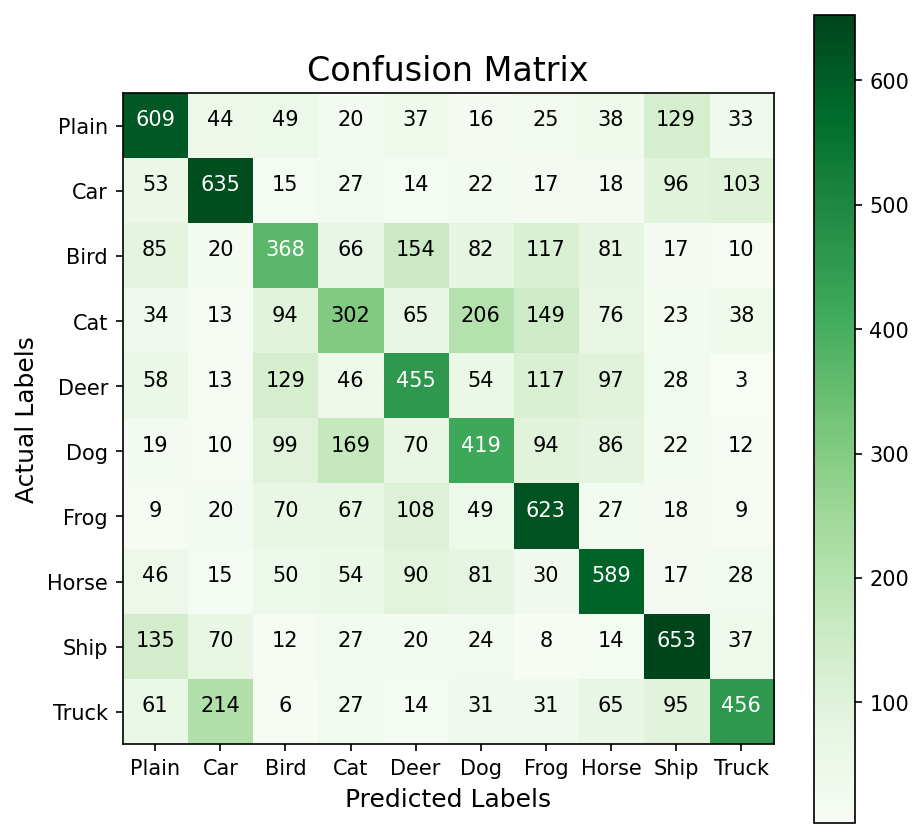

In [ ]:
plt.figure(figsize=(7,7), dpi=150)
plt.imshow(conf_matrix, cmap=plt.cm.Greens)

plt.title("Confusion Matrix", fontsize=16)
plt.ylabel("Actual Labels", fontsize=12)
plt.xlabel("Predicted Labels", fontsize=12)

tick_marks = np.arange(NR_CLASSES)
plt.yticks(tick_marks, LABEL_NAMES)
plt.xticks(tick_marks, LABEL_NAMES)

plt.colorbar()

for i, j in itertools.product(range(nr_rows), range(nr_cols)):
  plt.text(j, i, conf_matrix[i][j], horizontalalignment='center'
  ,color='white' if conf_matrix[i][j] > conf_matrix.max() / 2 else 'black')

plt.show()

In [ ]:
# True Positives
np.diag(conf_matrix)


array([609, 635, 368, 302, 455, 419, 623, 589, 653, 456])

In [ ]:
recall = np.diag(conf_matrix) / np.sum(conf_matrix, axis=1)
recall

array([0.609, 0.635, 0.368, 0.302, 0.455, 0.419, 0.623, 0.589, 0.653,
       0.456])

In [ ]:
precision = np.diag(conf_matrix) / np.sum(conf_matrix, axis=0)
precision

array([0.549, 0.602, 0.413, 0.375, 0.443, 0.426, 0.514, 0.54 , 0.595,
       0.626])

In [ ]:
avg_recall = np.mean(recall)
print(f'Model 2 recall score is {avg_recall:.2%}')

Model 2 recall score is 51.09%


In [ ]:
avg_precission = np.mean(precision)
print(f'Model 2 recall score is {avg_precission:.2%}')

Model 2 recall score is 50.83%


In [ ]:
F_Score = 2 * avg_precission * avg_recall / (avg_precission + avg_recall)
print(f'F score is {F_Score:.2%}')

F score is 50.96%
